In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

def get_data(filename):
    df = pd.read_csv(filename, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.set_index('Datetime')
    df = df.drop(['Date', 'Time'], axis=1)
    return df

In [2]:
eurusd = get_data('EURUSD_D1.csv')
gbpusd = get_data('GBPUSD_D1.csv')

1. Test Random Walk 
2. Take First Differences
3. Compute ACF and PACF
4. Fit a few AR, MA, and ARMA
5. Use Information Criterion to choose best model
6. Forecast over next days

Advancing
- GARCH Models
- Nonlinear Models
- Multivariate Time Series Models
- Regime Switching Models
- State Space Models and Kalman Filtering

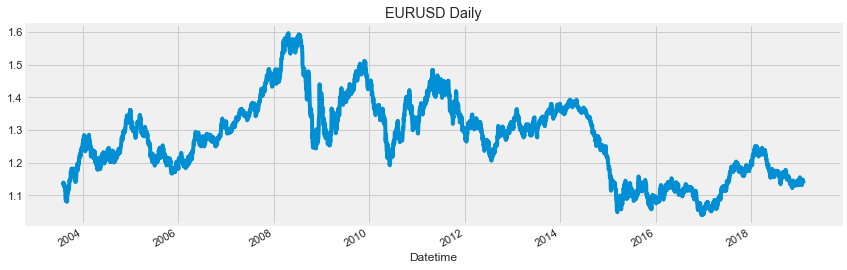

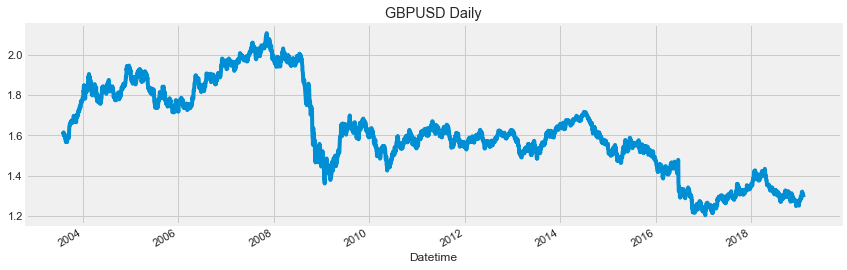

P-value : EURUSD 0.23715565004147082
P-value : GBPUSD 0.7369629037933086


In [84]:
# 1. Test Random Walk
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

fix = plt.figure(figsize=(13,9))
plt.subplot(2, 1, 1)
eurusd.Close.plot()
plt.title('EURUSD Daily')
plt.show()

plt.figure(figsize=(13,9))
plt.subplot(2,1,2)
gbpusd.Close.plot()
plt.title('GBPUSD Daily')
plt.show()

# Compute and print ADF p-value
result = adfuller(eurusd.Close)
print("P-value : EURUSD", result[1])

result = adfuller(gbpusd.Close)
print("P-value : GBPUSD", result[1])

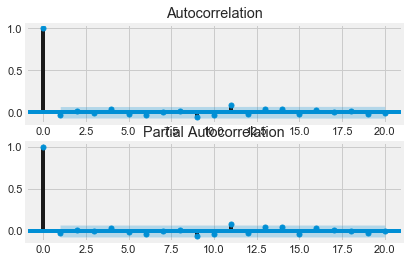

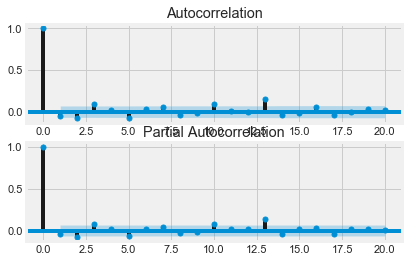

In [85]:
# 2.Take First Differences
# 3. Compute ACF and PACF
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
eurusd_diff = eurusd.Close.resample('W').last().pct_change()
eurusd_diff = eurusd_diff.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)
plot_acf(eurusd_diff, alpha=0.05, lags=20, ax=axes[0])
plot_pacf(eurusd_diff, alpha=0.05,  lags=20, ax=axes[1])
plt.show()

gbpusd_diff = gbpusd.Close.resample('W').last().pct_change()
gbpusd_diff = gbpusd_diff.dropna()

fig, axes = plt.subplots(2,1)
plot_acf(gbpusd_diff, alpha=0.05, lags=20, ax=axes[0])
plot_pacf(gbpusd_diff, alpha=0.05,  lags=20, ax=axes[1])
plt.show()

In [86]:
# 4. 5. 
# find the two lowest AIC values.
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(eurusd_diff, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(eurusd_diff, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(eurusd_diff, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(eurusd_diff, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

#------------------------------------------#
print('\n\n')
# Fit the data to an AR(1) model and print AIC:
mod = ARMA(gbpusd_diff, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(gbpusd_diff, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(gbpusd_diff, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(gbpusd_diff, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

#AR(1), MA(1) are the two lowest EURUSD
# AR(2) for GBPUSD

/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

The AIC for an AR(1) is:  -4627.993867781281
The AIC for an AR(2) is:  -4626.177799059309
The AIC for an MA(1) is:  -4627.973495739427
The AIC for an ARMA(1,1) is:  -4626.51247645152



The AIC for an AR(1) is:  -4634.380209195622
The AIC for an AR(2) is:  -4636.899255645989
The AIC for an MA(1) is:  -4634.661982552114


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [87]:
res

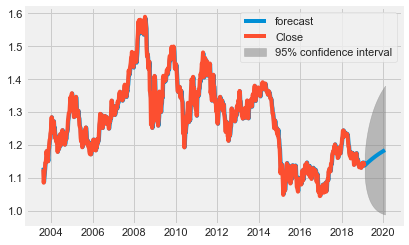

/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


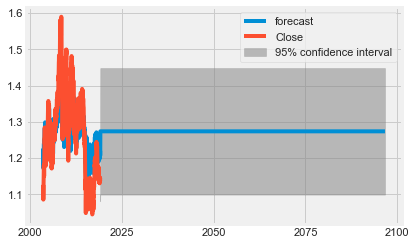

In [88]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model (p,d,q)
mod = ARMA(eurusd.Close.resample('W').last(), order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=1, end=len(eurusd_diff)+52)
plt.show()



# Forecast interest rates using an MA(1) model (p,d,q)
mod = ARMA(eurusd.Close.resample('W').last(), order=(0,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=1, end=len(eurusd)+1)
plt.show()

/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

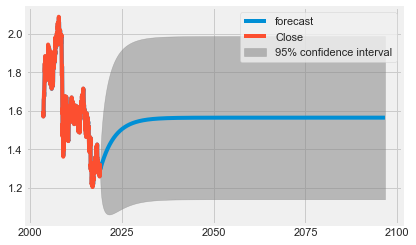

In [89]:
# Forecast interest rates using an AR(2) model (p,d,q)
mod = ARMA(gbpusd.Close.resample('W').last(), order=(2,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=1, end=len(gbpusd)+1)
plt.show()